# Arbre de décision avec des pinguins
Cours de Google : prédire l'espèce d'un pinguin à partir de ses caractéristiques.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [26]:
path = "penguins.csv"
df = pd.read_csv(path)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## La carte d'identité du dataset :
Le dataset provient de github et s'appelle simplement "Pinguins".
Le dataset est composé de 344 données qui représentent des pinguins à l'aide de 7 variables : espèce, île, longueur du bec (mm), largeur du bec (mm), longeur des nageoires (mm), masse (g) et leur sexe.

Le dataset comprend 3 variables catégoriques (espèce, île et sexe) et les 4 autres sont numériques.

Le dataset semble contenir quelques données vides. On les supprimera pour éviter les erreurs.
Les données numériques seront normalisées.

In [27]:
#Le dataset contient 2 lignes qui n'ont aucune données pour toutes les variables excepté l'ile et l'espèce.
#Plutôt que de remplir les champs vides ont fait le choix de supprimer les 2 lignes.
df_nettoye = df.dropna(axis=0)
df_nettoye

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
df = df_nettoye

## Statistique sur les données

In [29]:
#Commençons par des informations basiques sur les données numériques (moyenne, écart-type, quartiles, min, max...)
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: >

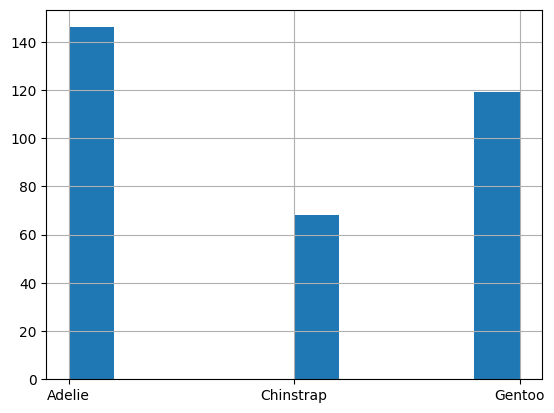

In [30]:
#Faisons l'histogramme de chaque espèce
df['species'].hist()


In [31]:
len(df["species"])

333

In [32]:
def pourcentages(dataset,col):
    total = len(dataset[col])
    print("Voici les statistiques pour chaque valeur de la colonne " + col + ".")
    for value in df[col].unique() :
        n = len(df[df[col]==value])
        pourcentage = round(n/total*100,2)
        print("La valeur " + value + " représente " + str(pourcentage) + "% des valeurs.")

pourcentages(df,"species")

Voici les statistiques pour chaque valeur de la colonne species.
La valeur Adelie représente 43.84% des valeurs.
La valeur Chinstrap représente 20.42% des valeurs.
La valeur Gentoo représente 35.74% des valeurs.


<Axes: >

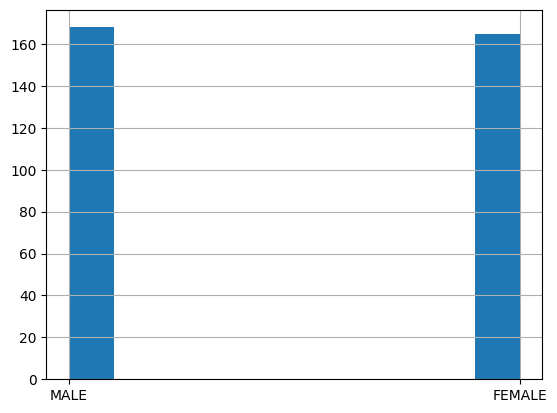

In [33]:
df['sex'].hist()

Histogramme pour la variable : island
Histogramme pour la variable : bill_length_mm
Histogramme pour la variable : bill_depth_mm
Histogramme pour la variable : flipper_length_mm
Histogramme pour la variable : body_mass_g
Histogramme pour la variable : sex


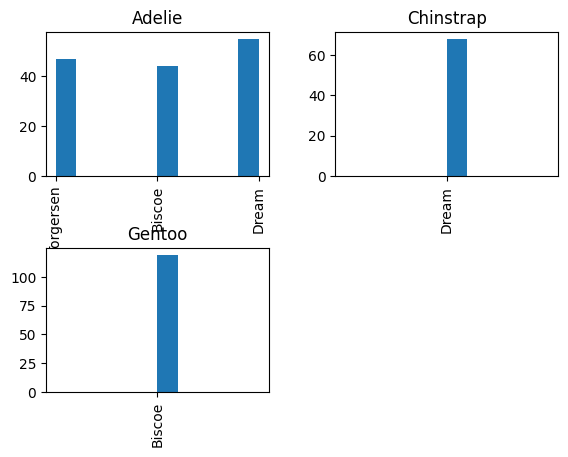

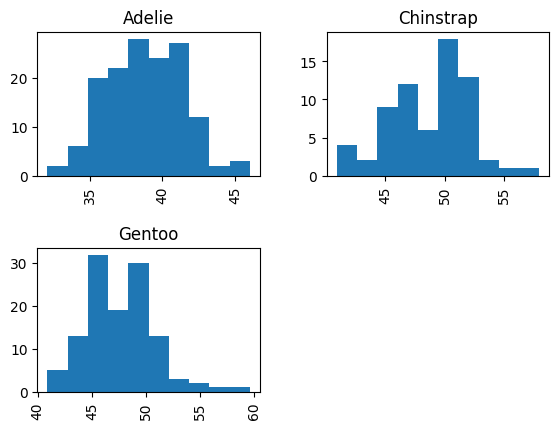

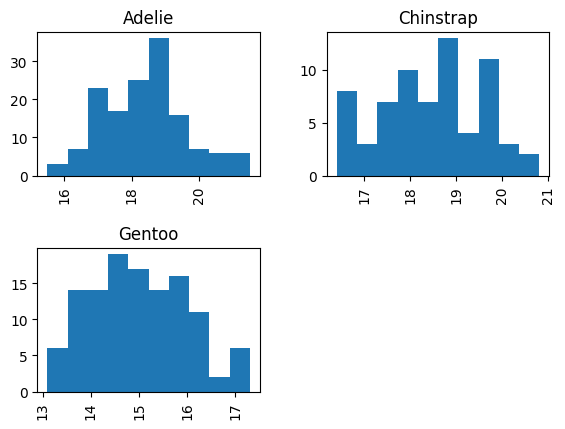

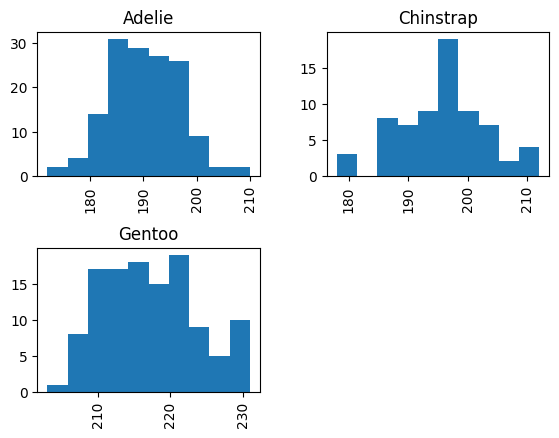

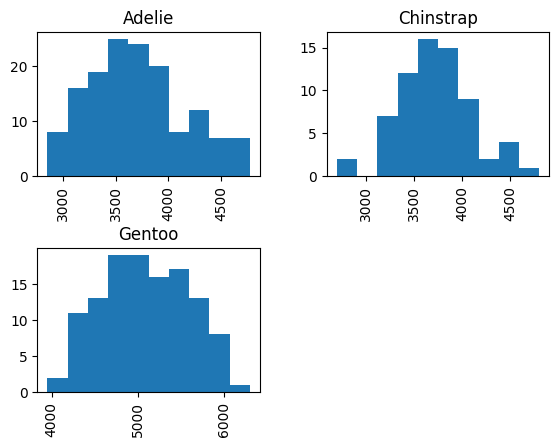

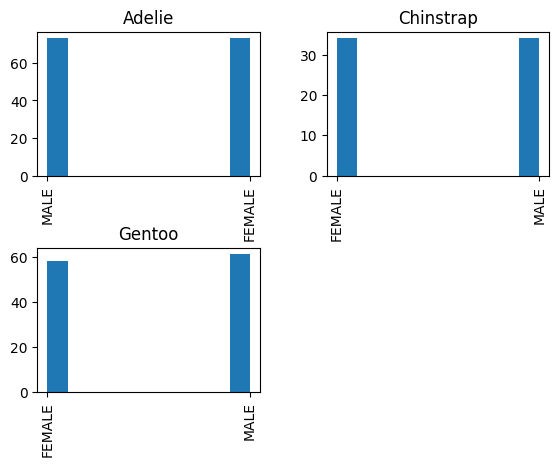

In [34]:
#Faisons quelques histogrammes pour voir les donnée pour chaque espèce.
def histogramme(dataset):
    for column in dataset.columns:
        if(column != "species"):
            print("Histogramme pour la variable : " + column)
            df.hist(column=column,by="species")

histogramme(df)

Faisons des scatters qui nous permettrons peut-être de voir apparaitre des choses

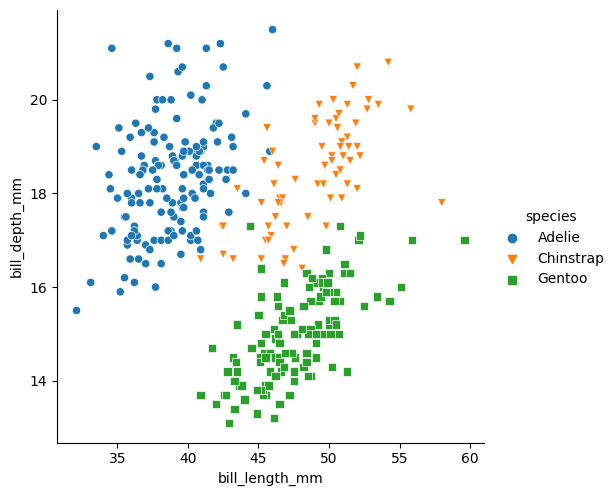

In [35]:
sns.pairplot(df, x_vars=['bill_length_mm'], y_vars=['bill_depth_mm'], height=5, hue='species', markers=['o', 'v', 's']) 

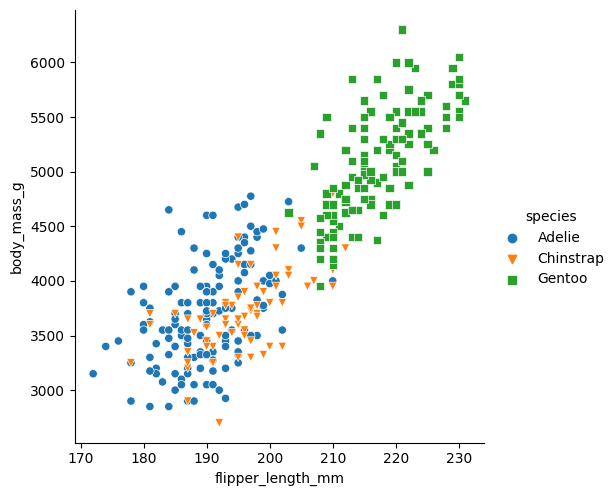

In [36]:
sns.pairplot(df, x_vars=['flipper_length_mm'], y_vars=['body_mass_g'], height=5, hue='species', markers=['o', 'v', 's']) 

Alors, elles donnent quoi ces données ?
Tout d'abord, on peut voir qu'il n'y a pas de données "bizarres" (masse négative par exemple).

On peut également remarquer que pour toutes les espèces il y a **autant de mâles que de femelles**.

La **répartition des espèces** représentées dans le dataset n'est **pas équitables**  :
    L'espèce Adelie représente 43.84% des valeurs.
    L'espèce Chinstrap représente 20.42% des valeurs.
    L'espèce Gentoo représente 35.74% des valeurs.

Les pinguins Gentoo et Chinstrap ne sont présents que sur une **île chacun** mais les pinguins Adélie sont sur les 3 îles.
    
La **longueur des nageoires** (flipper_length) semble être une **bonne variable pour différencier** les Gentoo des autres espèces d'après le 2eme scatter plot.

Le 1er scatter plot nous indique que les 3 espèces peuvent être **séparées à partir des dimensions de leur bec** (bill length and depth).

Enfin, il n'y a **pas de données trop extrêmes** pour les valeurs numériques.

## Préparation des données
- Normalisation
- Séparation en datasets d'entrainement et de test

In [37]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [38]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [39]:
#Normalisation des données
def normalisationForAll(dataframe):
    #On crée une copie du dataframe passe en argument
    nouveau_df = dataframe
    
    #On récupère les colonnes avec des données non-numériques pour les enlever.
    liste_colonnes_drop = []
    print(liste_colonnes_drop)
    for colonne in dataframe.columns:
        if(nouveau_df[colonne].dtype != np.float64 and nouveau_df[colonne].dtype != np.int64):
            liste_colonnes_drop.append(colonne)
    print(liste_colonnes_drop)
    
    #On enleve les colonnes sans donnees numeriques
    df_a_normaliser = nouveau_df.drop(liste_colonnes_drop, axis=1)
    
    #On applique la normalisation standard
    scaler = StandardScaler()
    donnees_normalisees = scaler.fit_transform(df_a_normaliser)
    df_donnees_normalisees = pd.DataFrame(donnees_normalisees, columns=df_a_normaliser.columns)
    
    #On remplace dans le nouveau dataframe les anciennes colonnes par les colonnes avec les donnes normalisées
    for colonne in liste_colonnes_drop :
        df_donnees_normalisees[colonne] = nouveau_df[colonne]

    return df_donnees_normalisees

df_normalise = normalisationForAll(df).dropna(axis=0)
df_normalise

[]
['species', 'island', 'sex']


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
0,-0.896042,0.780732,-1.426752,-0.568475,Adelie,Torgersen,MALE
1,-0.822788,0.119584,-1.069474,-0.506286,Adelie,Torgersen,FEMALE
2,-0.676280,0.424729,-0.426373,-1.190361,Adelie,Torgersen,FEMALE
4,-0.859415,1.747026,-0.783651,-0.692852,Adelie,Torgersen,FEMALE
5,-0.932669,0.323014,-1.426752,-0.723946,Adelie,Torgersen,MALE
...,...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,Gentoo,Biscoe,FEMALE
329,0.514098,-1.457000,1.002739,0.799674,Gentoo,Biscoe,MALE
330,1.173384,-0.744994,1.502928,1.919069,Gentoo,Biscoe,FEMALE
331,0.221082,-1.202712,0.788372,1.234995,Gentoo,Biscoe,MALE


In [40]:
df_normalise = df_normalise.reset_index()
df_normalise

,index,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
0,0,-0.896042,0.780732,-1.426752,-0.568475,Adelie,Torgersen,MALE
1,1,-0.822788,0.119584,-1.069474,-0.506286,Adelie,Torgersen,FEMALE
2,2,-0.676280,0.424729,-0.426373,-1.190361,Adelie,Torgersen,FEMALE
3,4,-0.859415,1.747026,-0.783651,-0.692852,Adelie,Torgersen,FEMALE
4,5,-0.932669,0.323014,-1.426752,-0.723946,Adelie,Torgersen,MALE
...,...,...,...,...,...,...,...,...
319,328,0.587352,-1.762145,0.931283,0.892957,Gentoo,Biscoe,FEMALE
320,329,0.514098,-1.457000,1.002739,0.799674,Gentoo,Biscoe,MALE
321,330,1.173384,-0.744994,1.502928,1.919069,Gentoo,Biscoe,FEMALE
322,331,0.221082,-1.202712,0.788372,1.234995,Gentoo,Biscoe,MALE


In [41]:
#Finalement pour utiliser un arbre de décision il ne faut que des données numériques donc on va appliquer le principe de dummification
def dummification(dataframe,colonnes):
    df = dataframe
    for colonne in colonnes :
        df_dum = pd.get_dummies(df[colonne])
        df_dumconcat = pd.concat([df,df_dum],axis=1)
        df = df_dumconcat.drop(columns=colonne,axis=1)
    return df

df_a_indexer = dummification(df_normalise,["island","sex"]).drop(columns="index",axis=1)
df_a_indexer

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,Biscoe,Dream,Torgersen,FEMALE,MALE
0,-0.896042,0.780732,-1.426752,-0.568475,Adelie,False,False,True,False,True
1,-0.822788,0.119584,-1.069474,-0.506286,Adelie,False,False,True,True,False
2,-0.676280,0.424729,-0.426373,-1.190361,Adelie,False,False,True,True,False
3,-0.859415,1.747026,-0.783651,-0.692852,Adelie,False,False,True,True,False
4,-0.932669,0.323014,-1.426752,-0.723946,Adelie,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
319,0.587352,-1.762145,0.931283,0.892957,Gentoo,True,False,False,True,False
320,0.514098,-1.457000,1.002739,0.799674,Gentoo,True,False,False,False,True
321,1.173384,-0.744994,1.502928,1.919069,Gentoo,True,False,False,True,False
322,0.221082,-1.202712,0.788372,1.234995,Gentoo,True,False,False,False,True


In [42]:
df_a_indexer.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species', 'Biscoe', 'Dream', 'Torgersen', 'FEMALE', 'MALE'],
      dtype='object')

In [43]:
#Réorganisons les colonnes pour pouvoir faire la séparation entre les données d'entrainement et de test
df_ordonne = df_a_indexer.reindex(columns= ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'Biscoe', 'Dream', 'Torgersen', 'FEMALE', 'MALE',"species"])
df_ordonne

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,FEMALE,MALE,species
0,-0.896042,0.780732,-1.426752,-0.568475,False,False,True,False,True,Adelie
1,-0.822788,0.119584,-1.069474,-0.506286,False,False,True,True,False,Adelie
2,-0.676280,0.424729,-0.426373,-1.190361,False,False,True,True,False,Adelie
3,-0.859415,1.747026,-0.783651,-0.692852,False,False,True,True,False,Adelie
4,-0.932669,0.323014,-1.426752,-0.723946,False,False,True,False,True,Adelie
...,...,...,...,...,...,...,...,...,...,...
319,0.587352,-1.762145,0.931283,0.892957,True,False,False,True,False,Gentoo
320,0.514098,-1.457000,1.002739,0.799674,True,False,False,False,True,Gentoo
321,1.173384,-0.744994,1.502928,1.919069,True,False,False,True,False,Gentoo
322,0.221082,-1.202712,0.788372,1.234995,True,False,False,False,True,Gentoo


In [44]:
train_df = df_ordonne.sample(frac=0.8)
test_df = df_ordonne.drop(train_df.index)

train_df_Y = train_df['species']
test_df_Y = test_df['species']

train_df_X = train_df.drop("species",axis=1)
test_df_X = test_df.drop("species",axis=1)

train_df_X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,FEMALE,MALE
121,-1.189058,0.679017,-0.140551,0.333260,False,False,True,False,True
204,-0.090248,0.475587,0.073816,-1.003795,False,True,False,False,True
90,-1.152431,-0.592422,-1.283840,-1.408021,False,True,False,True,False
122,-1.079177,0.221299,-0.998018,-0.972701,False,False,True,True,False
320,0.514098,-1.457000,1.002739,0.799674,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...
256,0.477471,-1.507858,0.645461,0.799674,True,False,False,False,True
66,-1.427134,-0.541564,-0.998018,-0.817229,False,False,True,True,False
277,0.770487,-0.795852,1.431472,1.110617,True,False,False,True,False
197,0.971936,1.391023,0.145272,-0.195343,False,True,False,False,True


## Modélisation

In [45]:
tree_classifier = DecisionTreeClassifier(max_depth=3,
random_state=42)
tree_classifier.fit(train_df_X, train_df_Y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [46]:
y_pred = tree_classifier.predict(test_df_X)
y_pred

array(['Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo'], dtype=object)

In [47]:
sk.metrics.multilabel_confusion_matrix(test_df_Y,y_pred)

array([[[30,  2],
        [ 1, 32]],

       [[51,  1],
        [ 2, 11]],

       [[46,  0],
        [ 0, 19]]], dtype=int64)

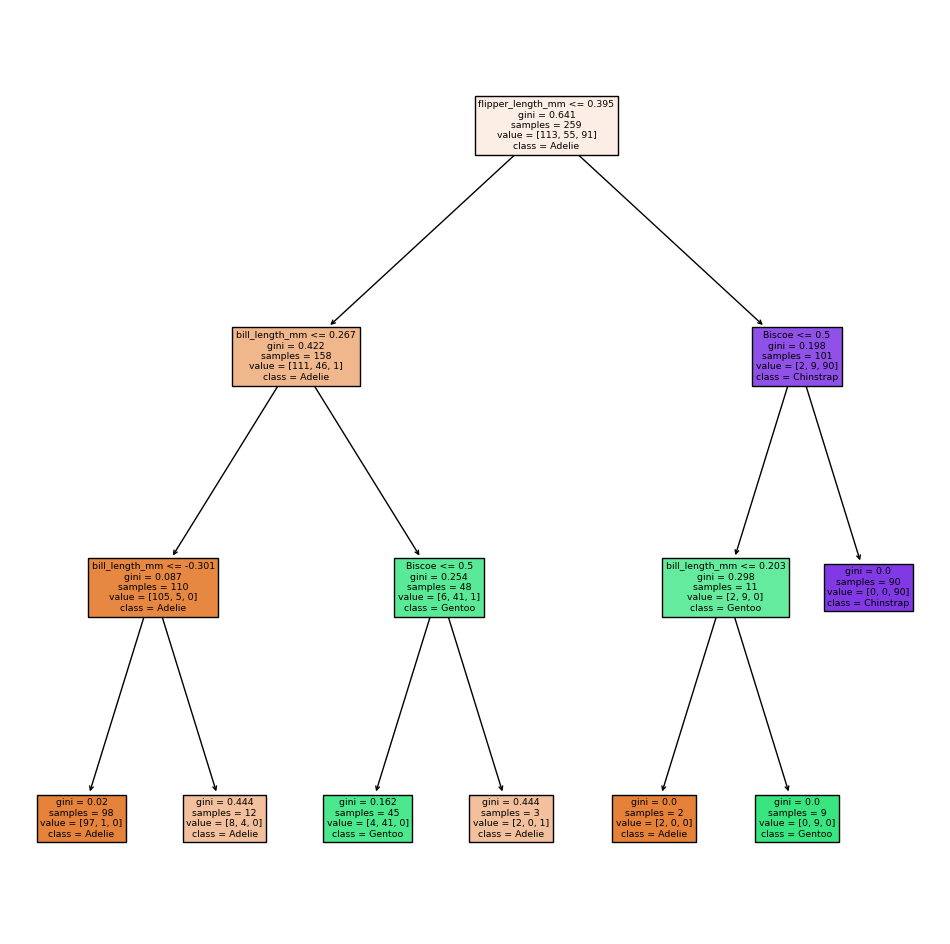

In [48]:
# Export en fichier dot (avec mises en forme)
class_names = ["Adelie","Gentoo","Chinstrap"]
feature_names = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","Biscoe","Dream","Torgersen","FEMALE","MALE"]
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(tree_classifier, feature_names=feature_names, class_names=class_names, filled=True, ax=ax)
plt.show()